## Testing Unet

## Image loading

In [1]:
from data_loader import *
device = torch.device("cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu"))

Define several core functions


In [2]:
train_dataset = f"dataset/train-loop{1}"
dataset = SegmentationDataset(train_dataset)
print(f'Load images {train_dataset}: {len(dataset)} ')


img0, msk0 = dataset[0]
print('Check type and size of Torch tensor', type(img0), type(msk0))
print(f'Image[0]  {img0.shape} max: {img0.max():0.7f} max: {img0.min():0.7f} type: {img0.type()}')
print(f'Image[0]  {msk0.shape} max: {msk0.max():0.7f} max: {msk0.min():0.7f} type: {msk0.type()}')

Load images dataset/train-loop1: 10 
Check type and size of Torch tensor <class 'torch.Tensor'> <class 'torch.Tensor'>
Image[0]  torch.Size([1, 128, 128]) max: 0.9999999 max: 0.0000000 type: torch.FloatTensor
Image[0]  torch.Size([128, 128]) max: 1.0000000 max: 0.0000000 type: torch.LongTensor


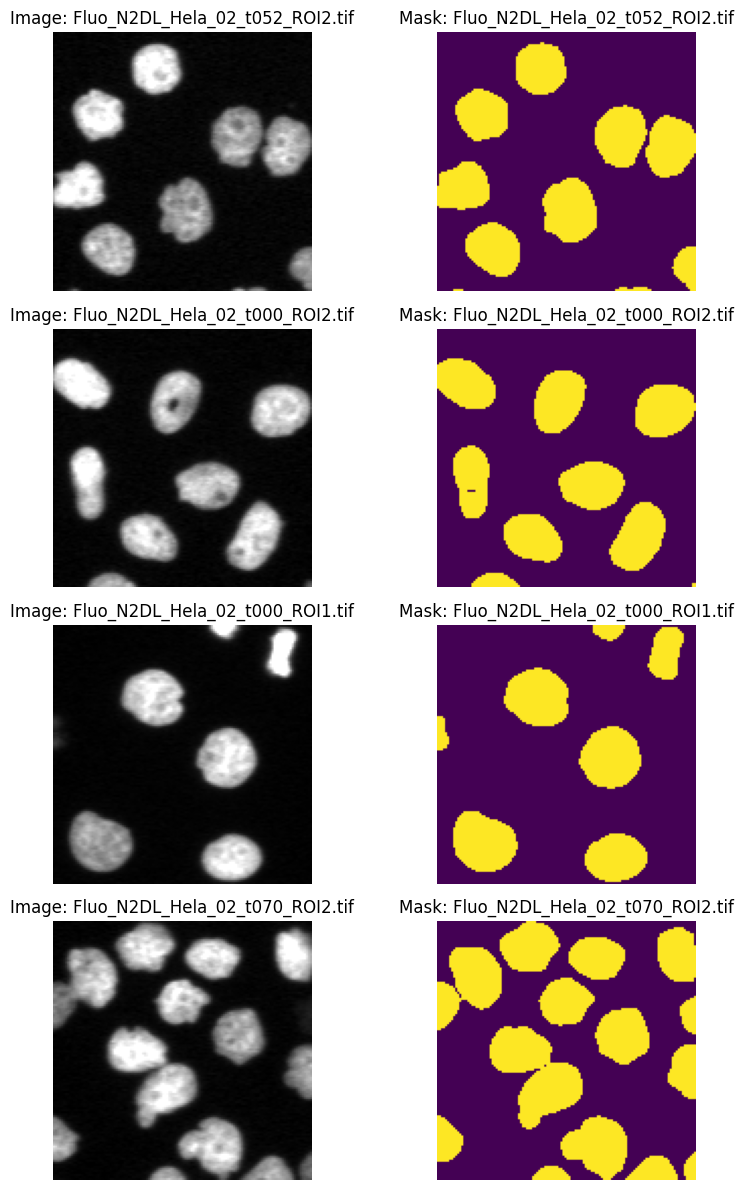

In [3]:
visualization_images(dataset, 4, 2)

In [4]:
val_ratio      = 0.25
batch_size     = 8
full_dataset = SegmentationDataset(train_dataset)
image0, mask0 = full_dataset[0]
print(type(image0))
print(f'Image 0 {image0.shape} max: {np.max(image0.shape)} {image0.type()}')
print(f'Image 0 {mask0.shape} max: {np.max(mask0.shape)} {mask0.type()}')
n_val   = max(1, int(len(full_dataset) * val_ratio))
n_train = len(full_dataset) - n_val
g = torch.Generator().manual_seed(1234)
perm = torch.randperm(len(full_dataset), generator=g).tolist()
train_dataset = Subset(full_dataset, perm[n_val:])
val_dataset   = Subset(full_dataset, perm[:n_val])

# num_workers=0 avoids PicklingError in notebooks
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  num_workers=0, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

print(f"Number of image in Train: {len(train_dataset)} | Val: {len(val_dataset)}")

<class 'torch.Tensor'>
Image 0 torch.Size([1, 128, 128]) max: 128 torch.FloatTensor
Image 0 torch.Size([128, 128]) max: 128 torch.LongTensor
Number of image in Train: 8 | Val: 2


In [5]:
import model
num_classes = 2
model = model.UNet(n_channels=1, n_classes=num_classes)

pretrained_model_name = "segmentation_unet.pth" 
pretrained_model_name = None 

if pretrained_model_name != None:
    ckpt = torch.load(pretrained_model_name, map_location="cpu")
    # If it was trained with DataParallel and keys start with "module.", strip the prefix:
    if isinstance(ckpt, dict) and len(ckpt) and next(iter(ckpt)).startswith("module."):
        ckpt = {k.replace("module.", "", 1): v for k, v in ckpt.items()}
    print('Checkpoints of the preload_model {pretrained_weigths}', len(ckpt))
    model.load_state_dict(ckpt, strict=True) 

num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"UNet: {num_params} number of trainable parameters of model ")
print(f'Pretrained model: {pretrained_model_name}' )

UNet: 31036546 number of trainable parameters of model 
Pretrained model: None


Using device: cpu
Starting training for 100 epochs...


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [1/100]  train_loss: 0.8076  val_loss: 0.6254  time: 6.03s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [2/100]  train_loss: 0.3200  val_loss: 0.6054  time: 5.53s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [3/100]  train_loss: 0.1874  val_loss: 0.5762  time: 5.33s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [4/100]  train_loss: 0.1493  val_loss: 0.5381  time: 5.20s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [5/100]  train_loss: 0.1328  val_loss: 0.4956  time: 5.28s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [6/100]  train_loss: 0.1240  val_loss: 0.4543  time: 4.99s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [7/100]  train_loss: 0.1176  val_loss: 0.4184  time: 4.91s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [8/100]  train_loss: 0.1122  val_loss: 0.3877  time: 4.75s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [9/100]  train_loss: 0.1074  val_loss: 0.3604  time: 4.81s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [10/100]  train_loss: 0.1034  val_loss: 0.3364  time: 4.97s


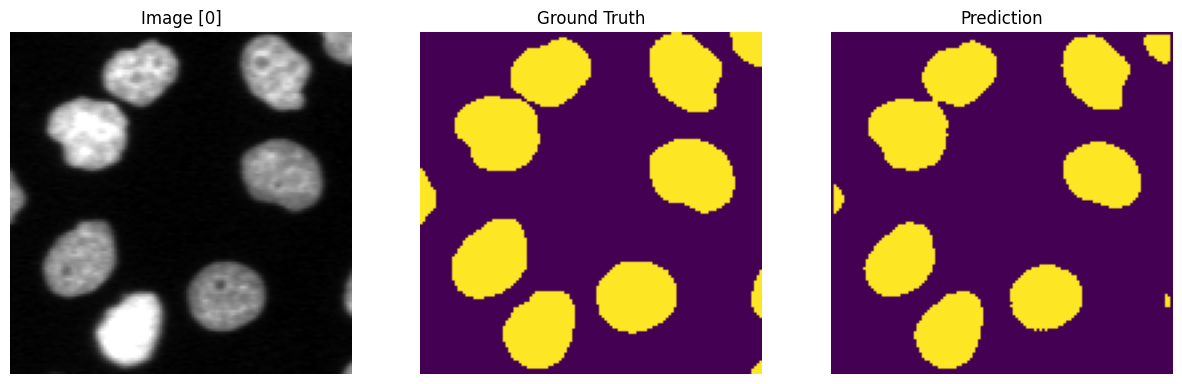

C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [11/100]  train_loss: 0.0998  val_loss: 0.3157  time: 5.03s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [12/100]  train_loss: 0.0960  val_loss: 0.2984  time: 4.93s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [13/100]  train_loss: 0.0925  val_loss: 0.2849  time: 5.02s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [14/100]  train_loss: 0.0890  val_loss: 0.2760  time: 5.24s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [15/100]  train_loss: 0.0860  val_loss: 0.2716  time: 5.22s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [16/100]  train_loss: 0.0828  val_loss: 0.2694  time: 5.26s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [17/100]  train_loss: 0.0798  val_loss: 0.2705  time: 5.15s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [18/100]  train_loss: 0.0771  val_loss: 0.2792  time: 5.26s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [19/100]  train_loss: 0.0741  val_loss: 0.2888  time: 5.28s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [20/100]  train_loss: 0.0714  val_loss: 0.3025  time: 5.59s


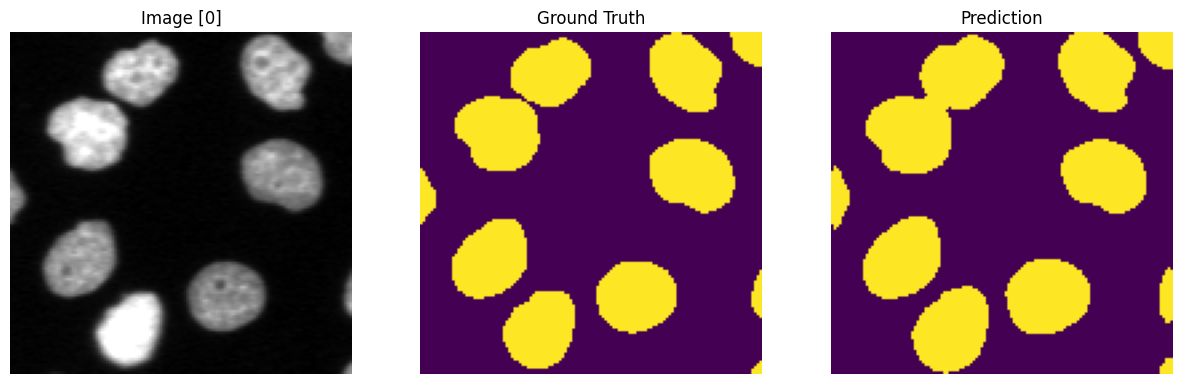

C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [21/100]  train_loss: 0.0689  val_loss: 0.3182  time: 4.83s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [22/100]  train_loss: 0.0665  val_loss: 0.3174  time: 4.95s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [23/100]  train_loss: 0.0644  val_loss: 0.3399  time: 4.74s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [24/100]  train_loss: 0.0621  val_loss: 0.3942  time: 4.96s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [25/100]  train_loss: 0.0592  val_loss: 0.5122  time: 5.03s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [26/100]  train_loss: 0.0572  val_loss: 0.5510  time: 5.13s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [27/100]  train_loss: 0.0556  val_loss: 0.7525  time: 5.30s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [28/100]  train_loss: 0.0533  val_loss: 0.8463  time: 5.21s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [29/100]  train_loss: 0.0514  val_loss: 0.8463  time: 4.87s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [30/100]  train_loss: 0.0500  val_loss: 0.9293  time: 4.74s


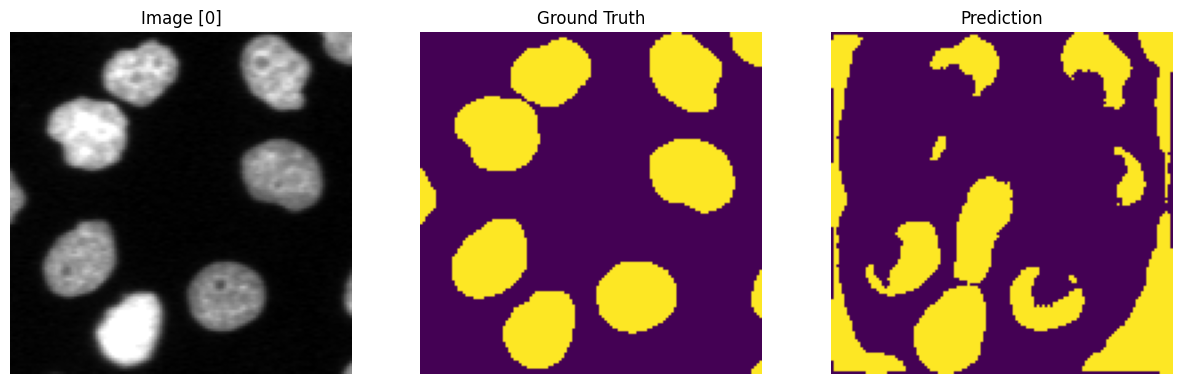

C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [31/100]  train_loss: 0.0483  val_loss: 1.0017  time: 4.82s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [32/100]  train_loss: 0.0466  val_loss: 0.9702  time: 4.83s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [33/100]  train_loss: 0.0452  val_loss: 0.9625  time: 4.92s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [34/100]  train_loss: 0.0440  val_loss: 0.9086  time: 4.95s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [35/100]  train_loss: 0.0429  val_loss: 0.7613  time: 4.76s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [36/100]  train_loss: 0.0421  val_loss: 0.7642  time: 4.82s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [37/100]  train_loss: 0.0406  val_loss: 0.6772  time: 4.84s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [38/100]  train_loss: 0.0391  val_loss: 0.5671  time: 5.00s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [39/100]  train_loss: 0.0381  val_loss: 0.5027  time: 4.92s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [40/100]  train_loss: 0.0375  val_loss: 0.4481  time: 4.97s


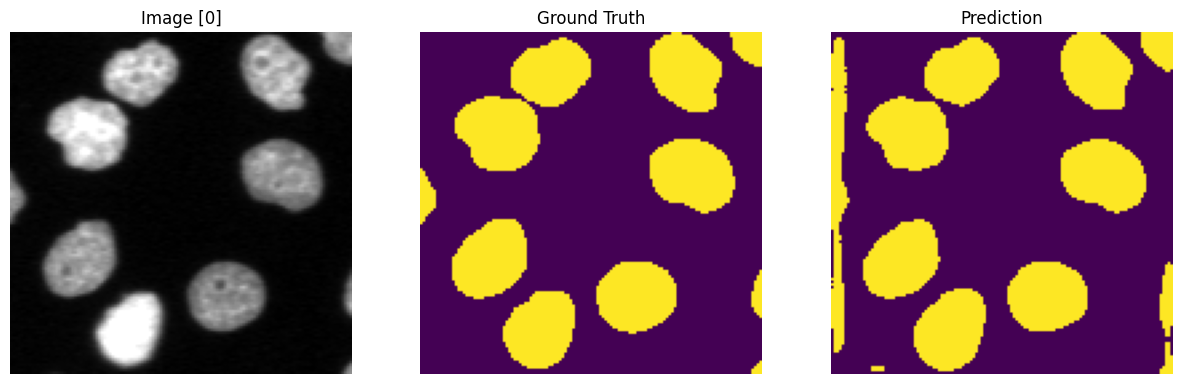

C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [41/100]  train_loss: 0.0369  val_loss: 0.3310  time: 5.04s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [42/100]  train_loss: 0.0356  val_loss: 0.2856  time: 4.85s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [43/100]  train_loss: 0.0341  val_loss: 0.2640  time: 4.91s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [44/100]  train_loss: 0.0334  val_loss: 0.2297  time: 4.85s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [45/100]  train_loss: 0.0322  val_loss: 0.2182  time: 4.95s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [46/100]  train_loss: 0.0317  val_loss: 0.2040  time: 4.89s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [47/100]  train_loss: 0.0306  val_loss: 0.1805  time: 4.91s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [48/100]  train_loss: 0.0298  val_loss: 0.1755  time: 4.84s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [49/100]  train_loss: 0.0291  val_loss: 0.1690  time: 4.96s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [50/100]  train_loss: 0.0281  val_loss: 0.1612  time: 5.08s


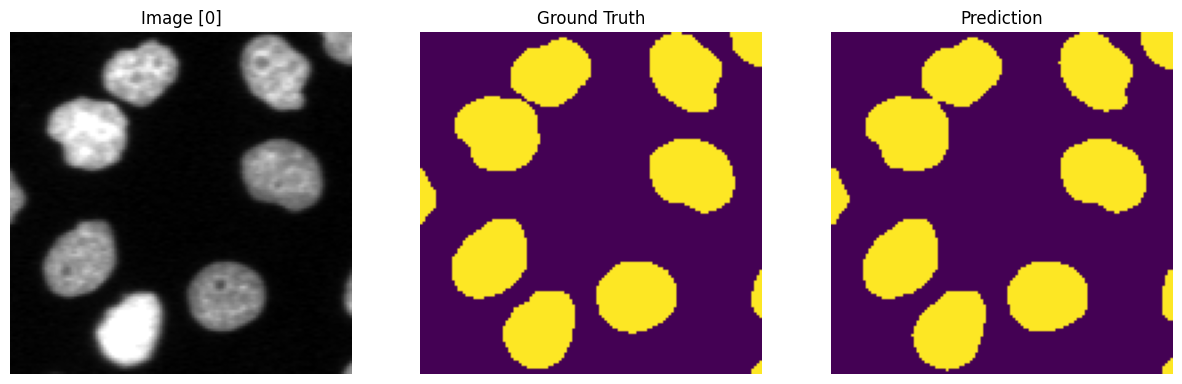

C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [51/100]  train_loss: 0.0276  val_loss: 0.1620  time: 4.93s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [52/100]  train_loss: 0.0269  val_loss: 0.1523  time: 4.79s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [53/100]  train_loss: 0.0263  val_loss: 0.1579  time: 4.92s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [54/100]  train_loss: 0.0259  val_loss: 0.1587  time: 4.80s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [55/100]  train_loss: 0.0266  val_loss: 0.1658  time: 4.89s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [56/100]  train_loss: 0.0291  val_loss: 0.1539  time: 4.88s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [57/100]  train_loss: 0.0297  val_loss: 0.1677  time: 5.83s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [58/100]  train_loss: 0.0252  val_loss: 0.1736  time: 5.58s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [59/100]  train_loss: 0.0264  val_loss: 0.1719  time: 5.17s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [60/100]  train_loss: 0.0239  val_loss: 0.1788  time: 5.14s


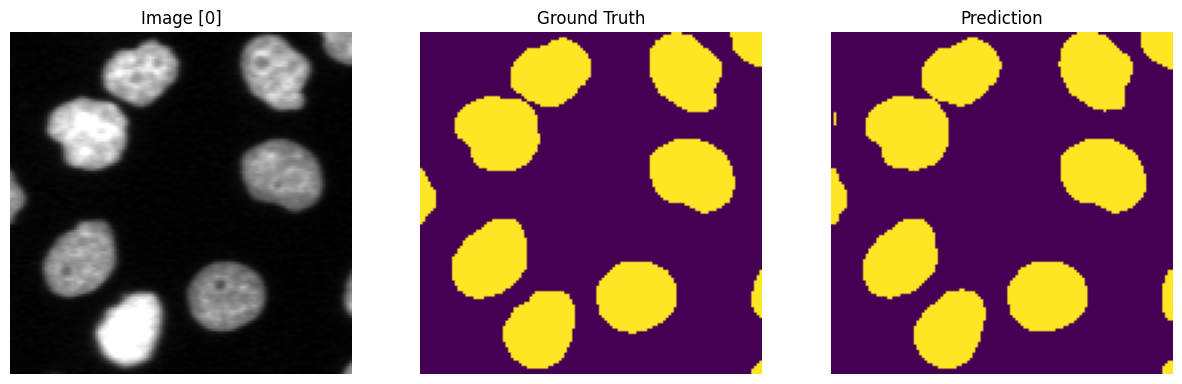

C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [61/100]  train_loss: 0.0247  val_loss: 0.1784  time: 5.11s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [62/100]  train_loss: 0.0230  val_loss: 0.1758  time: 5.18s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [63/100]  train_loss: 0.0234  val_loss: 0.1700  time: 5.16s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [64/100]  train_loss: 0.0221  val_loss: 0.1605  time: 5.19s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [65/100]  train_loss: 0.0218  val_loss: 0.1533  time: 5.20s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [66/100]  train_loss: 0.0212  val_loss: 0.1550  time: 5.20s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [67/100]  train_loss: 0.0207  val_loss: 0.1551  time: 5.17s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [68/100]  train_loss: 0.0200  val_loss: 0.1543  time: 5.24s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [69/100]  train_loss: 0.0199  val_loss: 0.1548  time: 5.18s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [70/100]  train_loss: 0.0191  val_loss: 0.1544  time: 4.98s


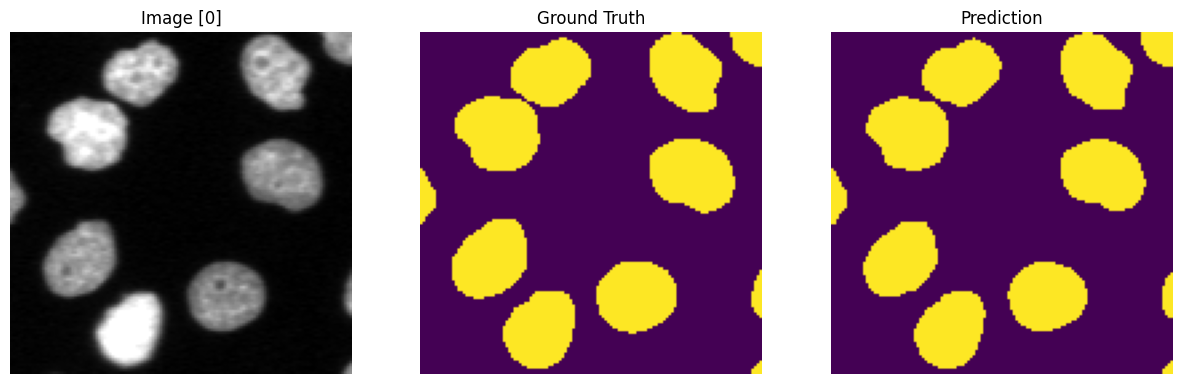

C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [71/100]  train_loss: 0.0188  val_loss: 0.1490  time: 5.05s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [72/100]  train_loss: 0.0183  val_loss: 0.1448  time: 4.89s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [73/100]  train_loss: 0.0179  val_loss: 0.1458  time: 4.90s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [74/100]  train_loss: 0.0175  val_loss: 0.1460  time: 4.93s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [75/100]  train_loss: 0.0172  val_loss: 0.1439  time: 4.88s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [76/100]  train_loss: 0.0167  val_loss: 0.1421  time: 4.81s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [77/100]  train_loss: 0.0165  val_loss: 0.1416  time: 4.89s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [78/100]  train_loss: 0.0160  val_loss: 0.1445  time: 4.91s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [79/100]  train_loss: 0.0157  val_loss: 0.1445  time: 4.93s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [80/100]  train_loss: 0.0153  val_loss: 0.1419  time: 5.42s


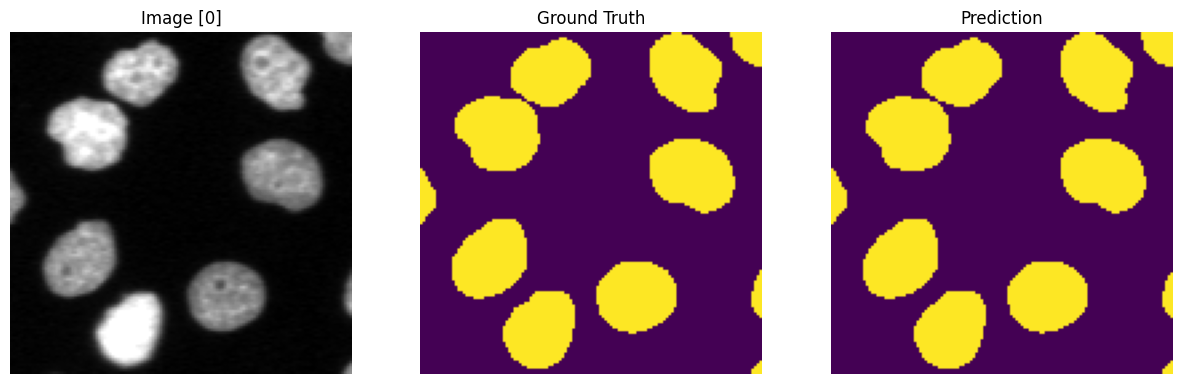

C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [81/100]  train_loss: 0.0151  val_loss: 0.1442  time: 5.28s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [82/100]  train_loss: 0.0148  val_loss: 0.1431  time: 4.97s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [83/100]  train_loss: 0.0144  val_loss: 0.1464  time: 4.85s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [84/100]  train_loss: 0.0141  val_loss: 0.1470  time: 4.77s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [85/100]  train_loss: 0.0138  val_loss: 0.1471  time: 4.88s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [86/100]  train_loss: 0.0135  val_loss: 0.1474  time: 4.86s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [87/100]  train_loss: 0.0135  val_loss: 0.1526  time: 4.89s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [88/100]  train_loss: 0.0145  val_loss: 0.1529  time: 4.85s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [89/100]  train_loss: 0.0214  val_loss: 0.1753  time: 5.02s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [90/100]  train_loss: 0.0292  val_loss: 0.1919  time: 4.80s


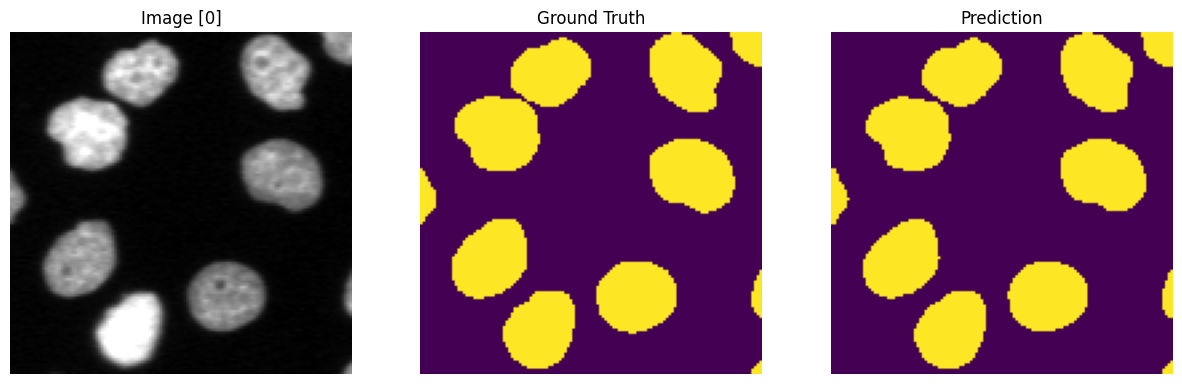

C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [91/100]  train_loss: 0.0186  val_loss: 0.2585  time: 4.95s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [92/100]  train_loss: 0.0235  val_loss: 0.2166  time: 4.86s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [93/100]  train_loss: 0.0231  val_loss: 0.2306  time: 4.81s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [94/100]  train_loss: 0.0201  val_loss: 0.2308  time: 4.84s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [95/100]  train_loss: 0.0189  val_loss: 0.2248  time: 4.81s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [96/100]  train_loss: 0.0177  val_loss: 0.2163  time: 4.84s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [97/100]  train_loss: 0.0175  val_loss: 0.2172  time: 4.83s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [98/100]  train_loss: 0.0165  val_loss: 0.1904  time: 4.92s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [99/100]  train_loss: 0.0155  val_loss: 0.1802  time: 4.72s


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [100/100]  train_loss: 0.0155  val_loss: 0.1795  time: 4.89s


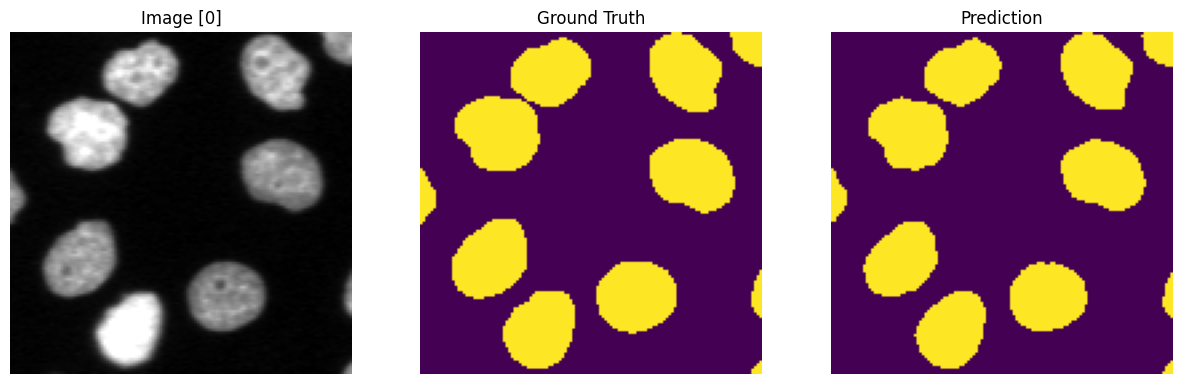

In [6]:
num_epochs   = 100
batch_size   = 8
snapshot     = max(1, num_epochs // 10)
model_name   = f'unet_E{num_epochs:04d}_{pretrained_model_name}'

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(f"Using device: {device}")

model.to(device)
print(f"Starting training for {num_epochs} epochs...")
train_losses, val_losses = [], []
for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    running = 0.0
    if torch.cuda.is_available(): torch.cuda.reset_peak_memory_stats()
    for imgs, msks in train_loader:
        imgs, msks = imgs.to(device, non_blocking=True), msks.to(device, non_blocking=True)
        optimizer.zero_grad(set_to_none=True)
        loss = criterion(model(imgs), msks)
        loss.backward()
        optimizer.step()
        running += loss.item() * imgs.size(0)
    tr_loss = running / max(1, len(train_dataset))
    train_losses.append(tr_loss)

    model.eval()
    val_running = 0.0
    with torch.no_grad():
        for imgs, msks in val_loader:
            imgs, msks = imgs.to(device, non_blocking=True), msks.to(device, non_blocking=True)
            vloss = criterion(model(imgs), msks)
            val_running += vloss.item() * imgs.size(0)
    va_loss = val_running / max(1, len(val_dataset))
    val_losses.append(va_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}]  train_loss: {tr_loss:.4f}  val_loss: {va_loss:.4f}  time: {time.time() - start_time:.2f}s")

    # ---- snapshot every N/10 epochs on the first training sample
    if (epoch + 1) % snapshot == 0:
        visualize_prediction(model, train_dataset, device, sample_idx=0)
        